## Hypothesis Testing for Cutlets.csv

In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [458]:
cutlets = pd.read_csv('3. Cutlets.csv')
print(cutlets.head())

   Unit A  Unit B
0  6.8090  6.7703
1  6.4376  7.5093
2  6.9157  6.7300
3  7.3012  6.7878
4  7.4488  7.1522


In [459]:
cutlets.shape

(35, 2)

In [460]:
alpha = 0.05 # Given

# Confidence Interval
ci = 1 - alpha
ci

0.95

In [461]:
# Calculations for Outliers

Q1 = cutlets.quantile(0.25)
print(f'Q1: {Q1}')
Q3 = cutlets.quantile(0.75)
print(f'Q3: {Q3}')
IQR = Q3 - Q1
print(f'IQR: {IQR}')
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
print(f'lower_bound: {lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'upper bound: {upper_bound}')
print()

# Outliers
for col in cutlets.columns:
    cutlets_outliers = cutlets[(cutlets[col] < lower_bound[col]) | (cutlets[col] > upper_bound[col])]
    if not cutlets_outliers.empty:
        print(f"Outlier(s) in column '{col}':")
        print(cutlets_outliers[col])
    else:
        print(f"No outliers in column '{col}'")
print()

# Remove outliers
cutlets_no_outliers = cutlets[(cutlets >= lower_bound) & (cutlets <= upper_bound)].dropna().reset_index(drop=True)
print("No outliers", cutlets_no_outliers)

Q1: Unit A    6.8315
Unit B    6.7536
Name: 0.25, dtype: float64
Q3: Unit A    7.28055
Unit B    7.19500
Name: 0.75, dtype: float64
IQR: Unit A    0.44905
Unit B    0.44140
dtype: float64
lower_bound: Unit A    6.157925
Unit B    6.091500
dtype: float64
upper bound: Unit A    7.954125
Unit B    7.857100
dtype: float64

No outliers in column 'Unit A'
Outlier(s) in column 'Unit B':
13    6.038
Name: Unit B, dtype: float64

No outliers     Unit A  Unit B
0   6.8090  6.7703
1   6.4376  7.5093
2   6.9157  6.7300
3   7.3012  6.7878
4   7.4488  7.1522
5   7.3871  6.8110
6   6.8755  7.2212
7   7.0621  6.6606
8   6.6840  7.2402
9   6.8236  7.0503
10  7.3930  6.8810
11  7.5169  7.4059
12  6.9246  6.7652
13  6.5797  7.1581
14  6.8394  7.0240
15  6.5970  6.6672
16  7.2705  7.4314
17  7.2828  7.3070
18  7.3495  6.7478
19  6.9438  6.8889
20  7.1560  7.4220
21  6.5341  6.5217
22  7.2854  7.1688
23  6.9952  6.7594
24  6.8568  6.9399
25  7.2163  7.0133
26  6.6801  6.9182
27  6.9431  6.3346
28  7.0852  

In [462]:
# Re-assigning to new variable
new_cutlets = cutlets_no_outliers
new_cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


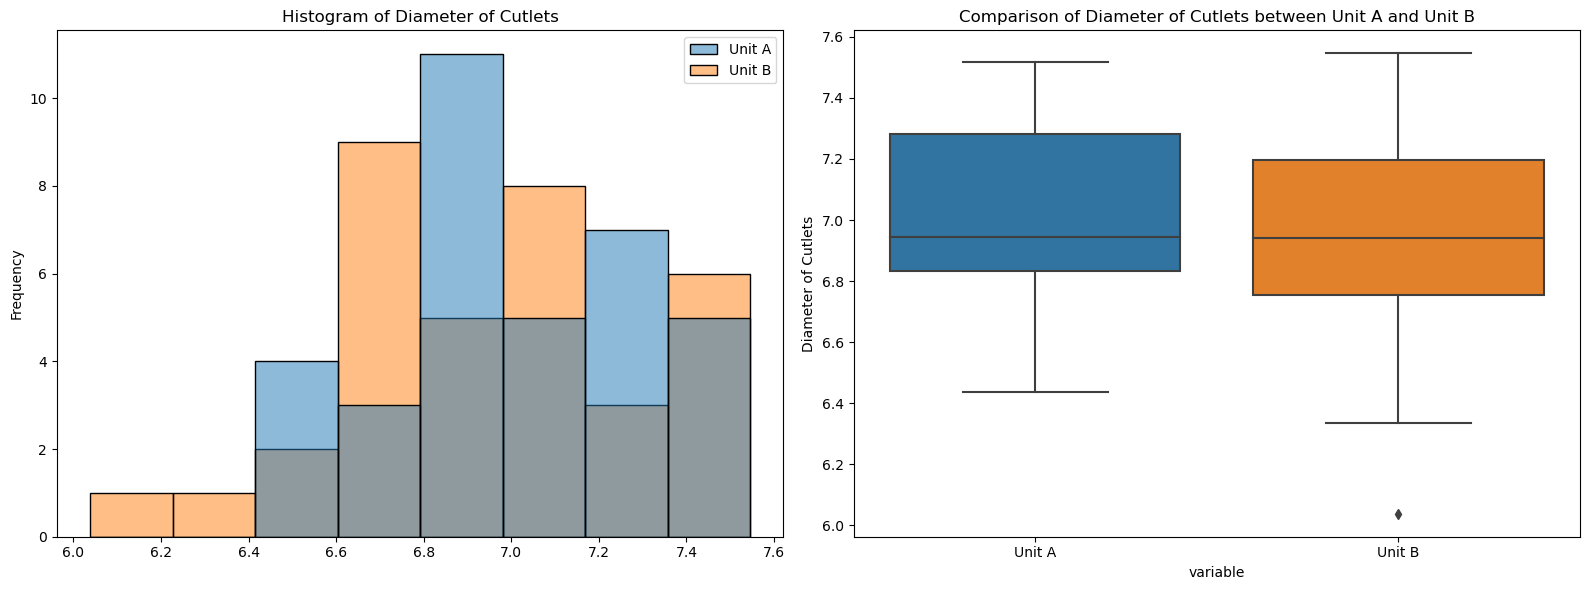

In [463]:
# Plot the graph(before removing outliers)

# Create a custom color palette
colors = ['#1f77b4', '#ff7f0e']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram
snsplot = sns.histplot([cutlets['Unit A'], cutlets['Unit B']], ax=axs[0], color=colors)
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Diameter of Cutlets')

# Plot the boxplot
sns.boxplot(x='variable', y='value', data=pd.melt(cutlets[['Unit A', 'Unit B']]), ax=axs[1], palette=colors)
axs[1].set_ylabel('Diameter of Cutlets')
axs[1].set_title('Comparison of Diameter of Cutlets between Unit A and Unit B')

plt.tight_layout()
plt.show()


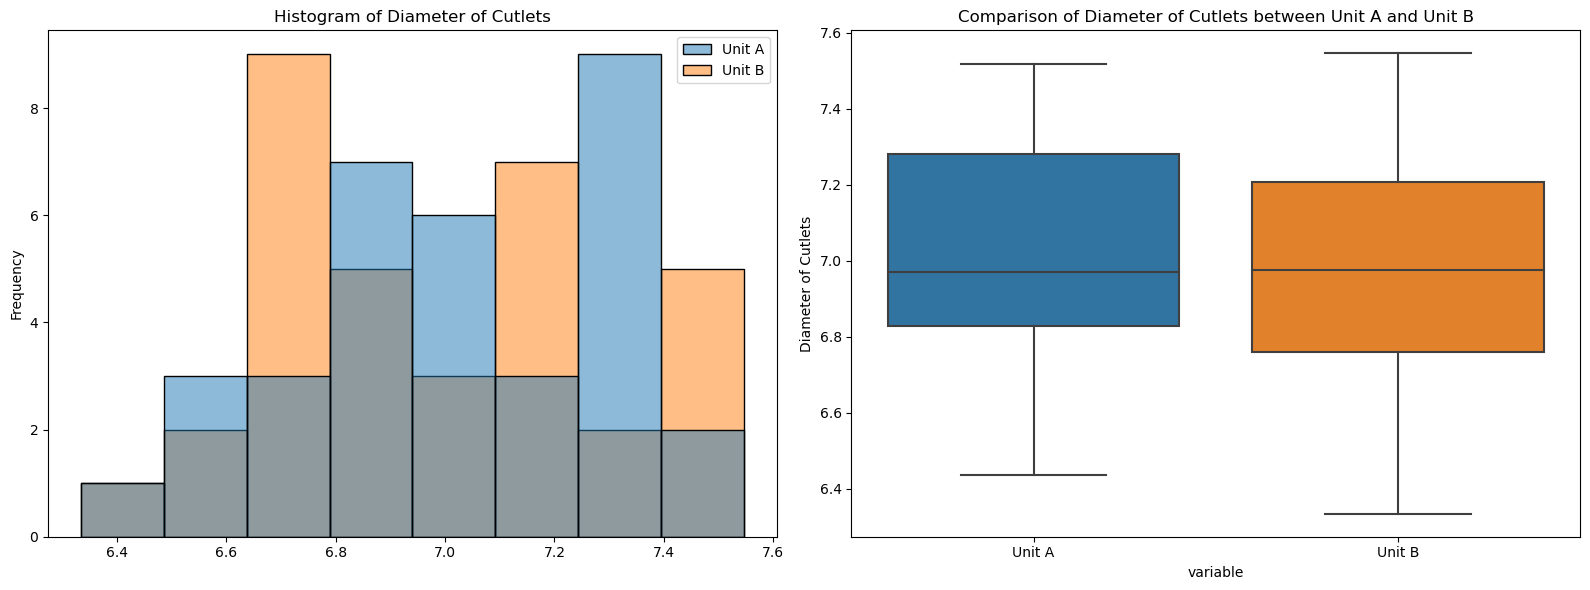

In [464]:
# Plot the graph(after removing outliers)

# Create a custom color palette
colors = ['#1f77b4', '#ff7f0e']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram
snsplot = sns.histplot([new_cutlets['Unit A'], new_cutlets['Unit B']], ax=axs[0], color=colors)
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Diameter of Cutlets')

# Plot the boxplot
sns.boxplot(x='variable', y='value', data=pd.melt(new_cutlets[['Unit A', 'Unit B']]), ax=axs[1], palette=colors)
axs[1].set_ylabel('Diameter of Cutlets')
axs[1].set_title('Comparison of Diameter of Cutlets between Unit A and Unit B')

plt.tight_layout()
plt.show()


In [465]:
# State null hypothesis
h0 = "There is no significant difference in the diameter of the cutlets between Unit A and Unit B."

In [466]:
# State alternate hypothesis
h1 = "There is a significant difference in the diameter of the cutlets between Unit A and Unit B."

In [467]:
# State alpha value
alpha = 0.05

In [468]:
# State decision rule (two-tail test)
decision_rule = "If p-value < alpha/2, reject null hypothesis."

In [469]:
# Perform the test

# Iterate over each column index in the new_cutlets DataFrame
for i in range(len(new_cutlets.columns)):
    # Nested loop to iterate over each column index starting from i+1 to avoid duplicate pairs.
    for j in range(i+1, len(new_cutlets.columns)):
        # Perform an independent t-test and p_value for each column
        t_statistic, p_value = stats.ttest_ind(new_cutlets[new_cutlets.columns[i]], new_cutlets[new_cutlets.columns[j]])

In [470]:
# Conclude the test
print("Null Hypothesis (H0):", h0)
print("\nAlternate Hypothesis (H1):", h1)
print("\nAlpha Value:", alpha)
print("\nDecision Rule:", decision_rule)
for i in range(len(new_cutlets.columns)):
    for j in range(i+1, len(new_cutlets.columns)):
        print(f"\nComparing {new_cutlets.columns[i]} and {new_cutlets.columns[j]}:")
        print("T-Statistic:", t_statistic)
        print("P-Value:", p_value)
        
        # Check whether to reject the null hypothesis or not
        if p_value < alpha:
            print(f"\nReject the null hypothesis. {h0}")
        else:
            print(f"\nFail to reject the null hypothesis. {h1}")

Null Hypothesis (H0): There is no significant difference in the diameter of the cutlets between Unit A and Unit B.

Alternate Hypothesis (H1): There is a significant difference in the diameter of the cutlets between Unit A and Unit B.

Alpha Value: 0.05

Decision Rule: If p-value < alpha/2, reject null hypothesis.

Comparing Unit A and Unit B:
T-Statistic: 0.41624950154151424
P-Value: 0.678577951904273

Fail to reject the null hypothesis. There is a significant difference in the diameter of the cutlets between Unit A and Unit B.


## Hypothesis Testing for LabTAT.csv

In [471]:
lab = pd.read_csv('4. LabTAT.csv')
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [472]:
lab.shape

(120, 4)

In [473]:
alpha = 0.05 # Given

# Confidence Interval
ci = 1 - alpha
ci

0.95

In [474]:
# Calculations for Outliers

Q1 = lab.quantile(0.25)
print(f'Q1: {Q1}')
Q3 = lab.quantile(0.75)
print(f'Q3: {Q3}')
IQR = Q3 - Q1
print(f'IQR: {IQR}')
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
print(f'lower_bound: {lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'upper bound: {upper_bound}')
print()

# Outliers
for col in lab.columns:
    lab_outliers = lab[(lab[col] < lower_bound[col]) | (lab[col] > upper_bound[col])]
    if not lab_outliers.empty:
        print(f"Outlier(s) in column '{col}':")
        print(lab_outliers[col])
    else:
        print(f"No outliers in column '{col}'")
print()

# Remove outliers
lab_no_outliers = lab[(lab >= lower_bound) & (lab <= upper_bound)].dropna().reset_index(drop=True)
print("No outliers", lab_no_outliers)

Q1: Laboratory 1    170.3350
Laboratory 2    168.0250
Laboratory 3    188.2325
Laboratory 4    154.0500
Name: 0.25, dtype: float64
Q3: Laboratory 1    186.5350
Laboratory 2    189.1125
Laboratory 3    211.3325
Laboratory 4    172.8825
Name: 0.75, dtype: float64
IQR: Laboratory 1    16.2000
Laboratory 2    21.0875
Laboratory 3    23.1000
Laboratory 4    18.8325
dtype: float64
lower_bound: Laboratory 1    146.03500
Laboratory 2    136.39375
Laboratory 3    153.58250
Laboratory 4    125.80125
dtype: float64
upper bound: Laboratory 1    210.83500
Laboratory 2    220.74375
Laboratory 3    245.98250
Laboratory 4    201.13125
dtype: float64

Outlier(s) in column 'Laboratory 1':
48     216.39
66     138.30
72     143.52
114    145.89
Name: Laboratory 1, dtype: float64
No outliers in column 'Laboratory 2'
No outliers in column 'Laboratory 3'
Outlier(s) in column 'Laboratory 4':
72     124.06
109    205.18
Name: Laboratory 4, dtype: float64

No outliers      Laboratory 1  Laboratory 2  Laborator

In [475]:
# Re-assigning to new variable
new_lab = lab_no_outliers
new_lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


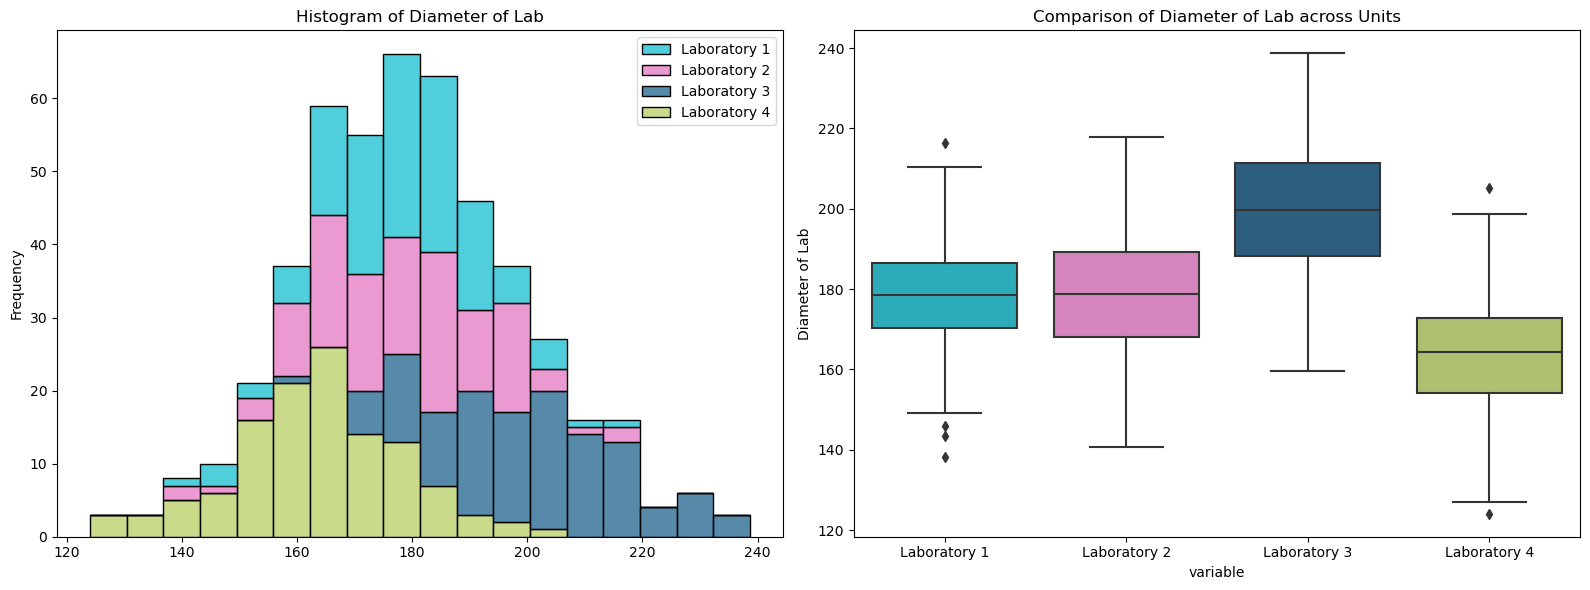

In [476]:
# Plot the graph(before removing outliers)

# Create a custom color palette
colors = ['#17becf', '#e377c2', '#1f618d', '#b7ce63']  # Add more colors if needed

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram
snsplot = sns.histplot(data=lab, ax=axs[0], color=colors, multiple="stack", palette=colors)
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Diameter of Lab')

# Plot the boxplot
melted_lab = pd.melt(lab)
sns.boxplot(x='variable', y='value', data=melted_lab, ax=axs[1], palette=colors)
axs[1].set_ylabel('Diameter of Lab')
axs[1].set_title('Comparison of Diameter of Lab across Units')

plt.tight_layout()
plt.show()

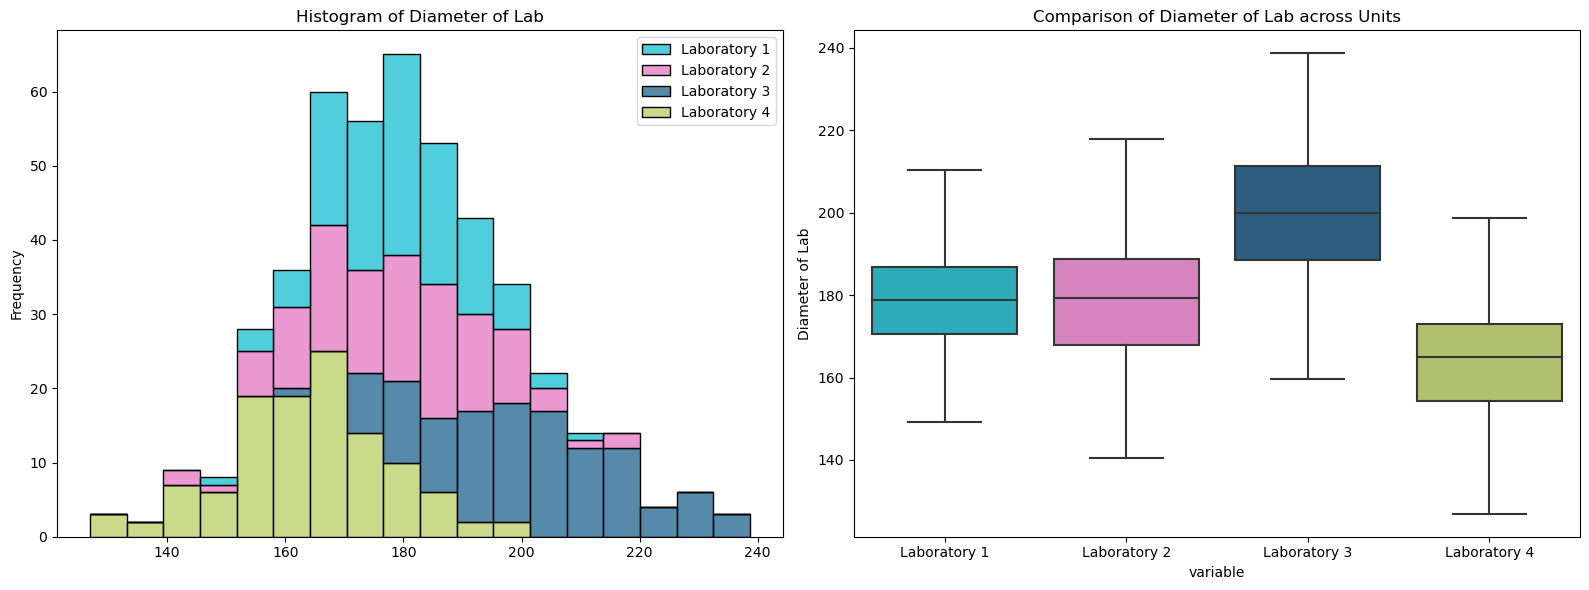

In [477]:
# Plot the graph(after removing outliers)

# Create a custom color palette
colors = ['#17becf', '#e377c2', '#1f618d', '#b7ce63']  # Add more colors if needed

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram
snsplot = sns.histplot(data=new_lab, ax=axs[0], color=colors, multiple="stack", palette=colors)
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Diameter of Lab')

# Plot the boxplot
melted_lab = pd.melt(new_lab)
sns.boxplot(x='variable', y='value', data=melted_lab, ax=axs[1], palette=colors)
axs[1].set_ylabel('Diameter of Lab')
axs[1].set_title('Comparison of Diameter of Lab across Units')

plt.tight_layout()
plt.show()

In [478]:
# State null hypothesis
h0 = "There is no a difference in the average TAT among the different laboratories."

In [479]:
# State alternate hypothesis
h1 = "There is a difference in the average TAT among the different laboratories."

In [480]:
# State alpha value
alpha = 0.05

In [481]:
# State decision rule (two-tail test)
decision_rule = "If p-value < alpha/2, reject null hypothesis."

In [482]:
# Perform the test

# Iterate over each column index in the new_cutlets DataFrame
for i in range(len(new_lab.columns)):
    # Nested loop to iterate over each column index starting from i+1 to avoid duplicate pairs.
    for j in range(i+1, len(new_lab.columns)):
        # Perform an independent t-test and p_value for each column
        f_statistic, p_value = stats.f_oneway(new_lab[new_lab.columns[i]], new_lab[new_lab.columns[j]])

In [483]:
# Conclude the test
print("\nNull Hypothesis (H0):", h0)
print("Alternate Hypothesis (H1):", h1)
print("Alpha Value:", alpha)
print("Decision Rule:", decision_rule)
for i in range(len(new_lab.columns)):
    for j in range(i+1, len(new_lab.columns)):
        print(f"\nComparing {new_lab.columns[i]} and {new_lab.columns[j]}:")
        print("F-Statistic:", f_statistic)
        print("P-Value:", p_value)
        
        # Check whether to reject the null hypothesis or not
        if p_value < alpha:
            print(f"\nReject the null hypothesis. {h0}")
        else:
            print(f"\nFail to reject the null hypothesis. {h1}")


Null Hypothesis (H0): There is no a difference in the average TAT among the different laboratories.
Alternate Hypothesis (H1): There is a difference in the average TAT among the different laboratories.
Alpha Value: 0.05
Decision Rule: If p-value < alpha/2, reject null hypothesis.

Comparing Laboratory 1 and Laboratory 2:
F-Statistic: 321.36357766546973
P-Value: 1.9867657756811292e-45

Reject the null hypothesis. There is no a difference in the average TAT among the different laboratories.

Comparing Laboratory 1 and Laboratory 3:
F-Statistic: 321.36357766546973
P-Value: 1.9867657756811292e-45

Reject the null hypothesis. There is no a difference in the average TAT among the different laboratories.

Comparing Laboratory 1 and Laboratory 4:
F-Statistic: 321.36357766546973
P-Value: 1.9867657756811292e-45

Reject the null hypothesis. There is no a difference in the average TAT among the different laboratories.

Comparing Laboratory 2 and Laboratory 3:
F-Statistic: 321.36357766546973
P-Val

## Hypothesis Testing for Sales of products in four different regions is tabulated for males and females.

In [484]:
sales = pd.read_csv('1. BuyerRatio.csv', index_col=False)
sales

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [485]:
# State null hypothesis
h0 = "All proportions are equal."

In [486]:
# State alternate hypothesis
h1 = "Not all Proportions are equal."

In [487]:
# State alpha value
alpha = 0.05 # Assume

In [488]:
# State decision rule (two-tail test)
decision_rule = "If p-value < alpha/2, reject null hypothesis."

In [489]:
# Extract the observed values
observed_values = sales.iloc[:, 1:].values
observed_values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [490]:
# Perform the Chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(observed_values)

In [491]:
# Conclude the test
print("Null Hypothesis (H0):", h0)
print("Alternate Hypothesis (H1):", h1)
print("Alpha Value:", alpha)
print("Decision Rule:", decision_rule)
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")
# Make a decision
if p_val < alpha:
    print(f"\nReject the null hypothesis. {h0}")
else:
    print(f"\nFail to reject the null hypothesis. {h1}")

Null Hypothesis (H0): All proportions are equal.
Alternate Hypothesis (H1): Not all Proportions are equal.
Alpha Value: 0.05
Decision Rule: If p-value < alpha/2, reject null hypothesis.
Chi-square statistic: 1.595945538661058
P-value: 0.6603094907091882

Fail to reject the null hypothesis. Not all Proportions are equal.


## Hypothesis Testing for Costomer+OrderForm.csv

In [492]:
telecall = pd.read_csv('2. Costomer+OrderForm.csv')
telecall.head(5)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [493]:
telecall.shape

(300, 4)

In [494]:
alpha = 0.05 # Given

# Confidence Interval
ci = 1 - alpha
ci

0.95

In [495]:
# State null hypothesis
h0 = "The defective % varies by centre."

In [496]:
# State alternate hypothesis
h1 = "The defective % does not varies by centre."

In [497]:
# State alpha value
alpha = 0.05 # Assume

In [498]:
# State decision rule (two-tail test)
decision_rule = "If p-value < alpha/2, reject null hypothesis."

In [499]:
# Performing Chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(telecall.columns, telecall.iloc[0]))

# Print results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Check significance
if p_val < alpha:
    print(f"\nReject the null hypothesis. {h0}")
else:
    print(f"\nFail to reject the null hypothesis. {h1}")

Chi-square statistic: 4.0
P-value: 0.26146412994911117

Fail to reject the null hypothesis. The defective % does not varies by centre.


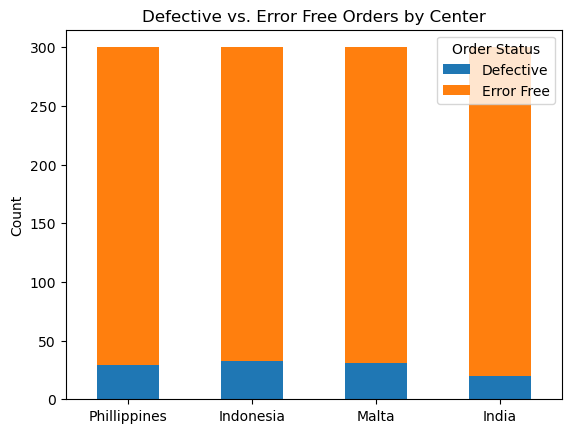

In [500]:
# Count the number of defective and error-free orders for each center
counts = telecall.apply(pd.Series.value_counts, axis=0).T
counts = counts[['Defective', 'Error Free']]

# Plot the bar graph
counts.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Defective vs. Error Free Orders by Center')
plt.legend(title='Order Status')
plt.xticks(rotation=0)
plt.show()